In [49]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Load the Student Performance Data Set
Count the Number of Rows = 25000, Check for Empty Cells - there are none


In [50]:
# Importing necessary libraries
import pandas as pd
file_path = '/content/drive/MyDrive/Colab Notebooks/DataScience102_Project/Student_Performance.csv'
# Load the dataset
data = pd.read_csv(file_path)

# Count the total number of rows in the dataset
total_rows = data.shape[0]

print(f'Total number of rows: {total_rows}\n\n')

#remove duplicate rows
data = data.drop_duplicates()
print('The total number of rows after removing duplicate rows is ', data.shape[0])



Total number of rows: 25000


The total number of rows after removing duplicate rows is  15000


###Bivariate Analysis - Correlation Matrix

Correlation Matrix:
                            age  study_hours  attendance_percentage  \
age                    1.000000     0.004240               0.004521   
study_hours            0.004240     1.000000              -0.009486   
attendance_percentage  0.004521    -0.009486               1.000000   
math_score             0.000575     0.802971               0.252210   
science_score          0.008525     0.804551               0.248960   
english_score          0.002694     0.804208               0.253859   
overall_score          0.004981     0.905885               0.288473   

                       math_score  science_score  english_score  overall_score  
age                      0.000575       0.008525       0.002694       0.004981  
study_hours              0.802971       0.804551       0.804208       0.905885  
attendance_percentage    0.252210       0.248960       0.253859       0.288473  
math_score               1.000000       0.785904       0.788176       0.885394  
scienc

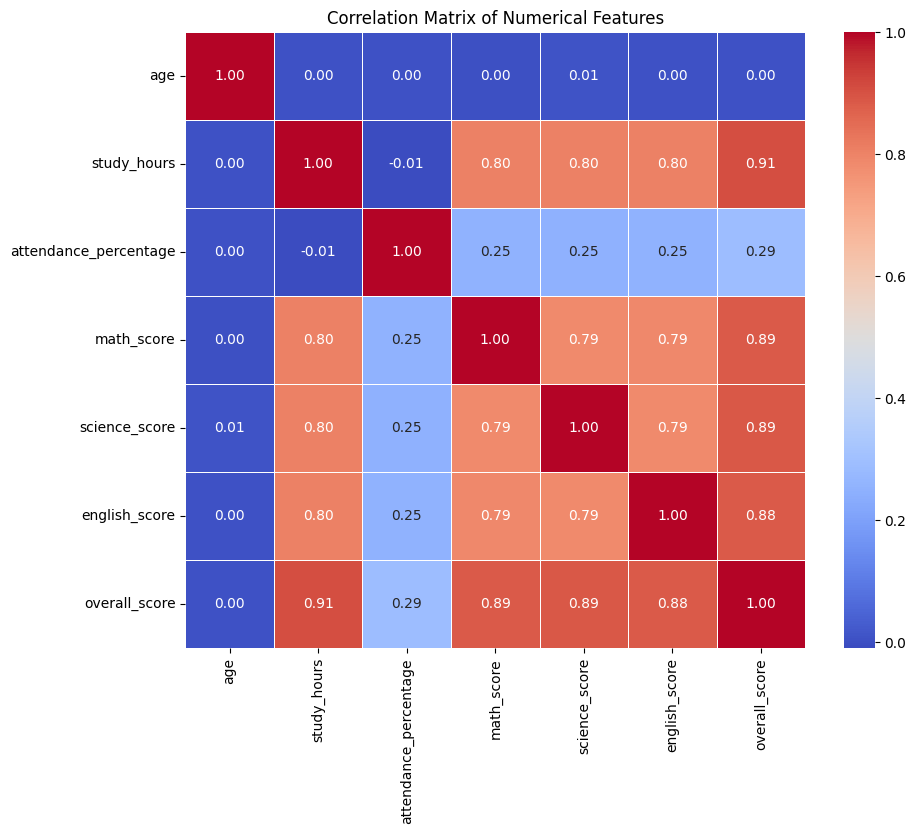

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols_for_corr = ['age','study_hours','attendance_percentage','math_score','science_score', 'english_score','overall_score']

# Calculate the correlation matrix
correlation_matrix = data[numerical_cols_for_corr].corr()

print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

###Bivariate Analysis - Numberical vs. Categorical Variables (Box Plots)


--- Bivariate Analysis: Numerical vs. Categorical Variables (Box Plots) ---


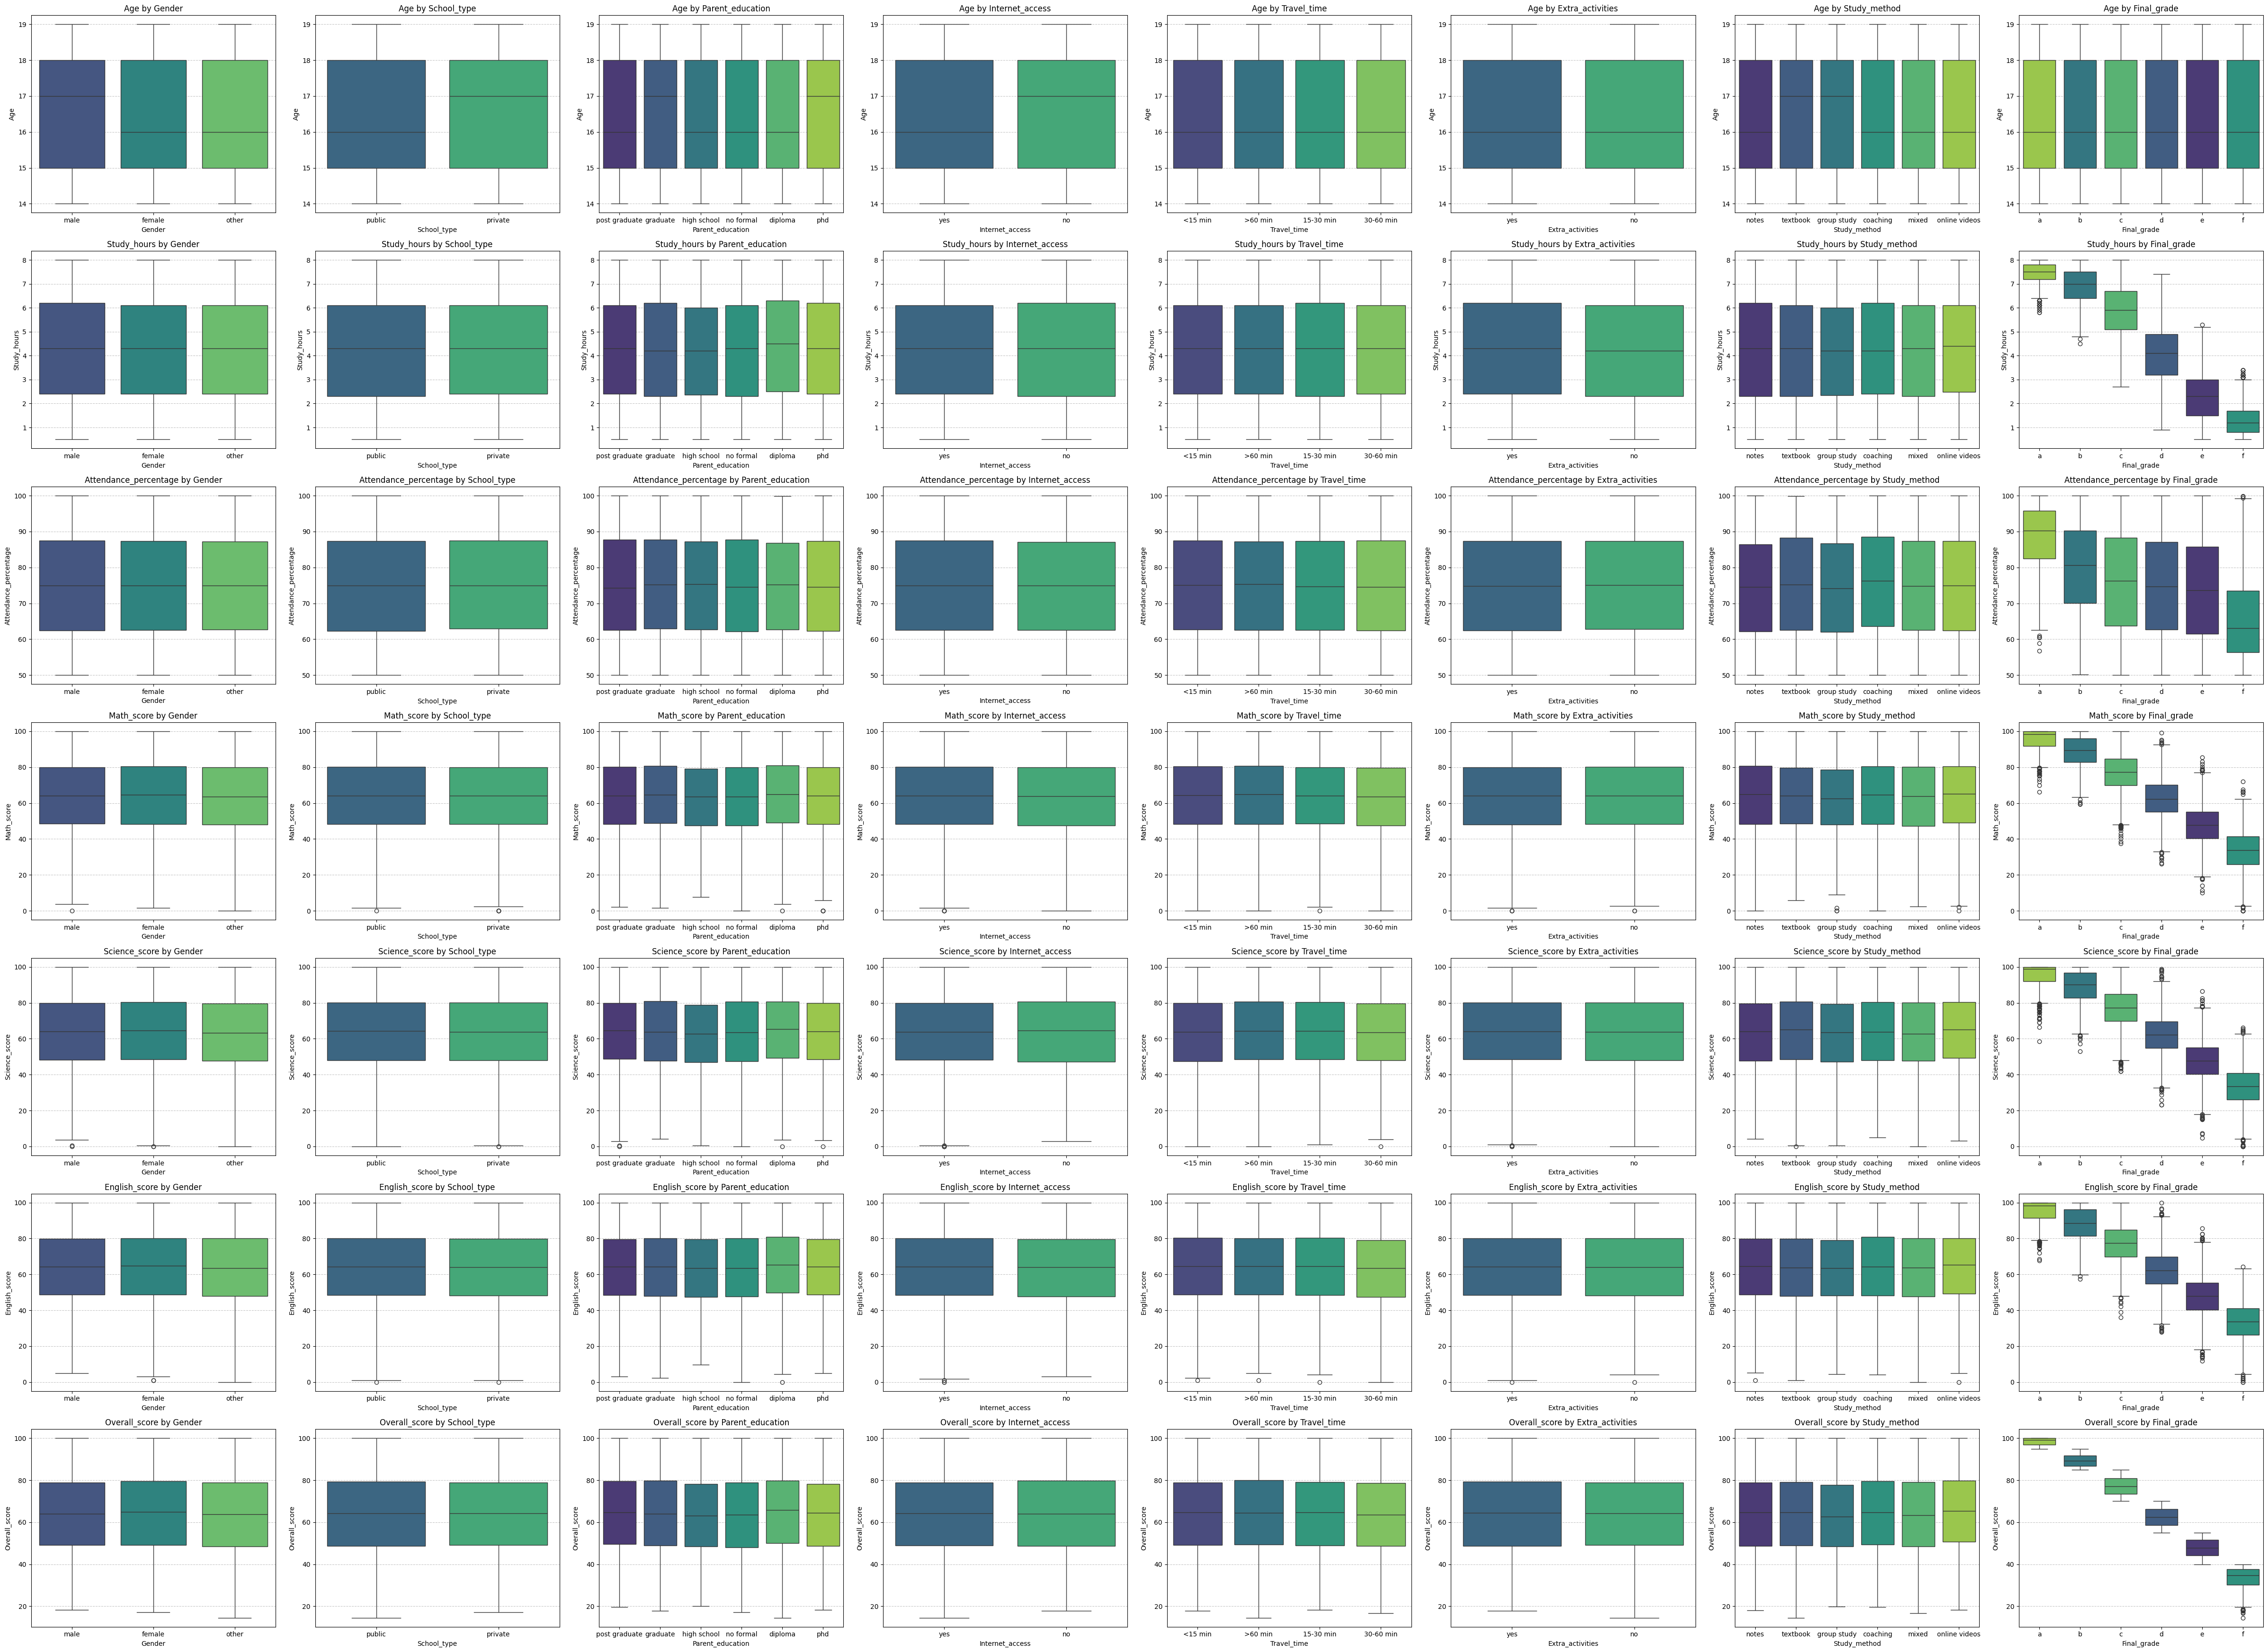

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_vars = ['gender', 'school_type','parent_education','internet_access',
               'travel_time','extra_activities', 'study_method', 'final_grade']
numerical_vars= ['age','study_hours','attendance_percentage','math_score','science_score', 'english_score','overall_score']

print("\n--- Bivariate Analysis: Numerical vs. Categorical Variables (Box Plots) ---")

# Define the grid dimensions for the subplots
num_rows = len(numerical_vars)
num_cols = len(categorical_vars)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 6, num_rows * 5))
axes = axes.flatten()

plot_index = 0
# Define the desired order for final grades
final_grade_order = ['a', 'b', 'c', 'd', 'e', 'f']

for num_col in numerical_vars:
    for cat_col in categorical_vars:
        ax = axes[plot_index]
        # Use the specific order for 'final_grade' if it's the current categorical column
        if cat_col == 'final_grade':
            sns.boxplot(data=data, x=cat_col, y=num_col, hue=cat_col, palette='viridis', legend=False, ax=ax, order=final_grade_order)
        else:
            sns.boxplot(data=data, x=cat_col, y=num_col, hue=cat_col, palette='viridis', legend=False, ax=ax)
        ax.set_title(f'{num_col.capitalize()} by {cat_col.capitalize()}')
        ax.set_xlabel(cat_col.capitalize())
        ax.set_ylabel(num_col.capitalize())
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        plot_index += 1

plt.tight_layout()
plt.show()

###Bivariate Analysis: Categorical vs. Categorical Variables (Grouped Bar Charts)

###Create a Categorical Varibable for Study Hours

In [53]:
import pandas as pd

# Define the bins and labels for the new 'study_time' qualitative category
bins = [0, 1, 2,3, 4, 5, 6,7, float('inf')]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8']

# Create the new 'study_time' column using pd.cut
data['study_time'] = pd.cut(data['study_hours'], bins=bins, labels=labels, right=True)

# Display the counts of the new 'study_time' categories to verify
print("Distribution of new 'study_time' category:")
display(data['study_time'].value_counts())




Distribution of new 'study_time' category:


,count
study_time,
1-2,2060
4-5,2053
5-6,2012
6-7,1992
3-4,1949
7-8,1934
2-3,1927
0-1,1073


###Bivariate Analysis: Study Time


--- Bivariate Analysis: Categorical vs. Categorical Variables (Grouped Bar Charts - Proportions) ---


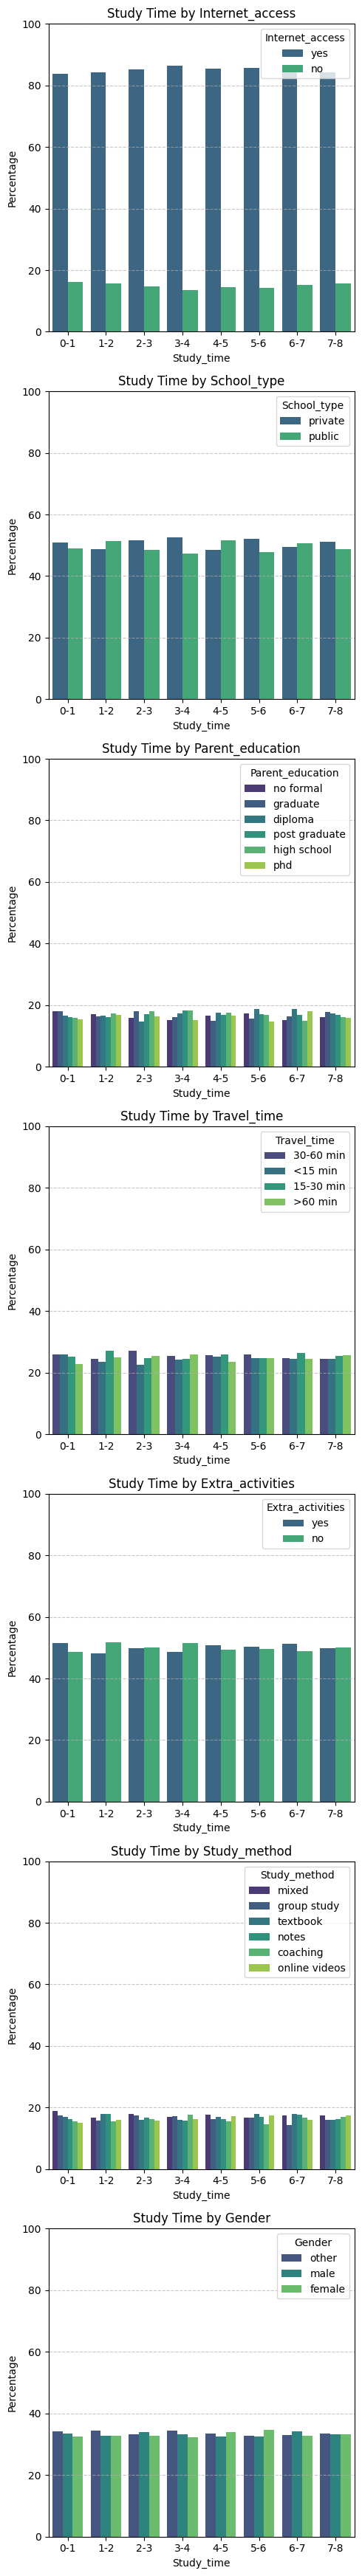

In [54]:
categorical_pairs = [
    ('study_time', 'internet_access'),
    ('study_time', 'school_type'),
    ('study_time', 'parent_education'),
    ('study_time', 'travel_time'),
    ('study_time', 'extra_activities'),
    ('study_time', 'study_method'),
    ('study_time', 'gender')
]

print("\n--- Bivariate Analysis: Categorical vs. Categorical Variables (Grouped Bar Charts - Proportions) ---")

# Define the grid dimensions for the subplots
num_rows = 7
num_cols = 1

# Create a figure and a set of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, (cat1, cat2) in enumerate(categorical_pairs):
    if i < len(axes): # Ensure we don't try to plot beyond the available subplots
        # Calculate proportions
        proportions = data.groupby(cat1, observed=False)[cat2].value_counts(normalize=True).mul(100).rename('percentage').reset_index()

        sns.barplot(data=proportions, x=cat1, y='percentage', hue=cat2, palette='viridis', ax=axes[i])
        axes[i].set_title(f'Study Time by {cat2.capitalize()}')
        axes[i].set_xlabel(cat1.capitalize())
        axes[i].set_ylabel('Percentage')
        axes[i].legend(title=cat2.capitalize())
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)
        axes[i].tick_params(axis='x', rotation=0)
        axes[i].set_ylim(0, 100) # Set y-limit for percentages

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

###Scatterplot of Study Hours versus Overall Score

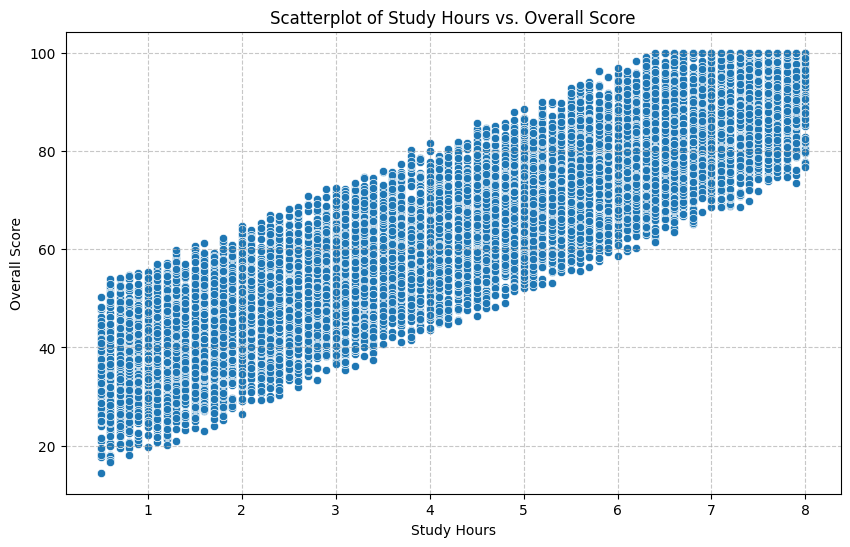

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='study_hours', y='overall_score', data=data)
plt.title('Scatterplot of Study Hours vs. Overall Score')
plt.xlabel('Study Hours')
plt.ylabel('Overall Score')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

###Scatterplot of Atteendance Percentage versus Overall Score

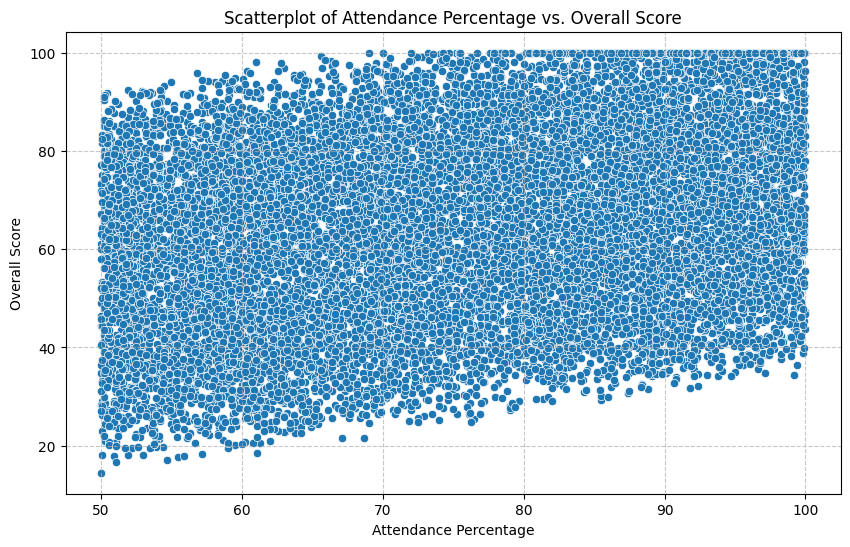

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='attendance_percentage', y='overall_score', data=data)
plt.title('Scatterplot of Attendance Percentage vs. Overall Score')
plt.xlabel('Attendance Percentage')
plt.ylabel('Overall Score')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

###Create Categorical Variable for Attendance

In [57]:
import numpy as np
import pandas as pd

# Define the conditions for each category
conditions = [
    (data['attendance_percentage'] > 50) & (data['attendance_percentage'] < 60),
    (data['attendance_percentage'] >= 60) & (data['attendance_percentage'] < 70),
    (data['attendance_percentage'] >= 70) & (data['attendance_percentage'] < 78),
    (data['attendance_percentage'] >= 78) & (data['attendance_percentage'] < 90),
    (data['attendance_percentage'] >= 90) & (data['attendance_percentage'] <= 100)
]

# Define the labels for each category
choices = ['50-60%', '60-70%', '70-78%', '78-90%', '90-100%']

# Create the new 'attendance_category' column using np.select
# Values not covered by the conditions will be assigned a default, e.g., '<50%'
data['attendance_category'] = np.select(conditions, choices, default='<50%')

# Display the counts of the new attendance_category to verify
print("Distribution of new 'attendance_category':")
display(data['attendance_category'].value_counts())

Distribution of new 'attendance_category':


,count
attendance_category,
78-90%,3632
60-70%,2986
90-100%,2977
50-60%,2964
70-78%,2419
<50%,22


###Bivariate Analysis Attendance Percentage


--- Bivariate Analysis: Categorical vs. Categorical Variables (Grouped Bar Charts - Proportions) ---


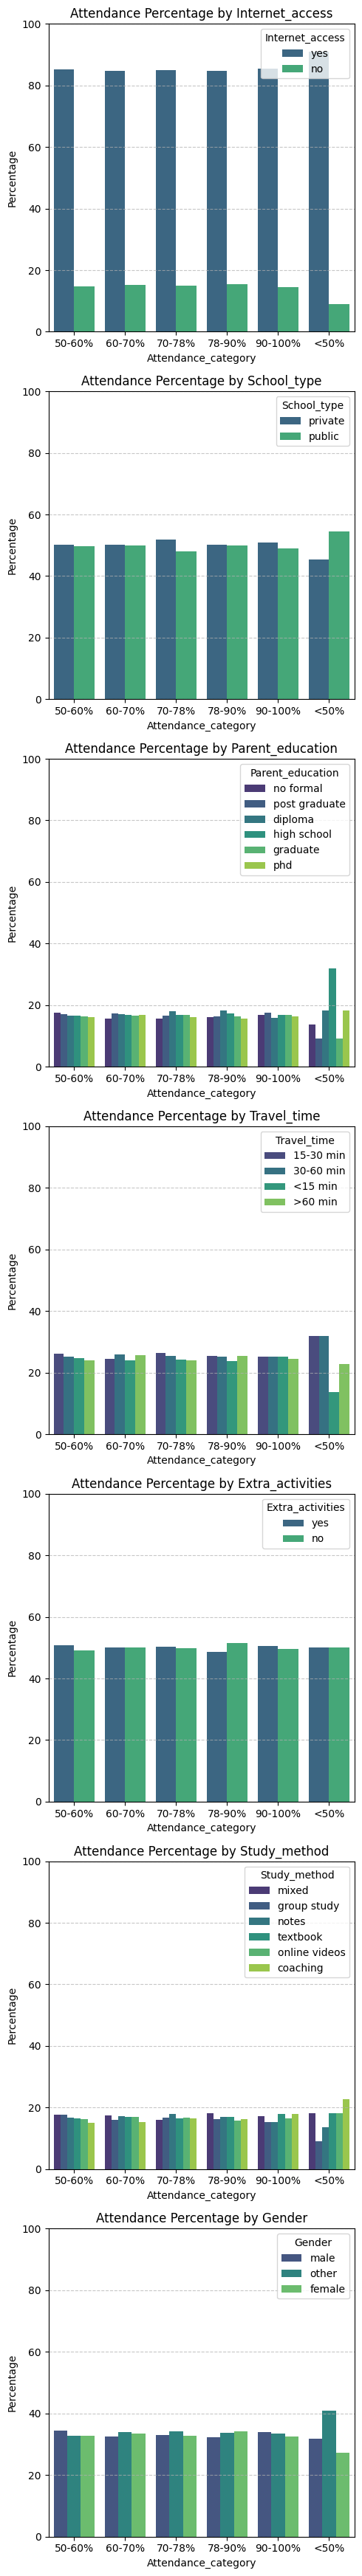

In [58]:
categorical_pairs = [
    ('attendance_category', 'internet_access'),
    ('attendance_category', 'school_type'),
    ('attendance_category', 'parent_education'),
    ('attendance_category', 'travel_time'),
    ('attendance_category', 'extra_activities'),
    ('attendance_category', 'study_method'),
    ('attendance_category', 'gender')
]

print("\n--- Bivariate Analysis: Categorical vs. Categorical Variables (Grouped Bar Charts - Proportions) ---")

# Define the grid dimensions for the subplots
num_rows = 7
num_cols = 1

# Create a figure and a set of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, (cat1, cat2) in enumerate(categorical_pairs):
    if i < len(axes): # Ensure we don't try to plot beyond the available subplots
        # Calculate proportions
        proportions = data.groupby(cat1, observed=False)[cat2].value_counts(normalize=True).mul(100).rename('percentage').reset_index()

        sns.barplot(data=proportions, x=cat1, y='percentage', hue=cat2, palette='viridis', ax=axes[i])
        axes[i].set_title(f'Attendance Percentage by {cat2.capitalize()}')
        axes[i].set_xlabel(cat1.capitalize())
        axes[i].set_ylabel('Percentage')
        axes[i].legend(title=cat2.capitalize())
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)
        axes[i].tick_params(axis='x', rotation=0)
        axes[i].set_ylim(0, 100) # Set y-limit for percentages

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

###Boxplot of Overall Score Versus Attendance Categories

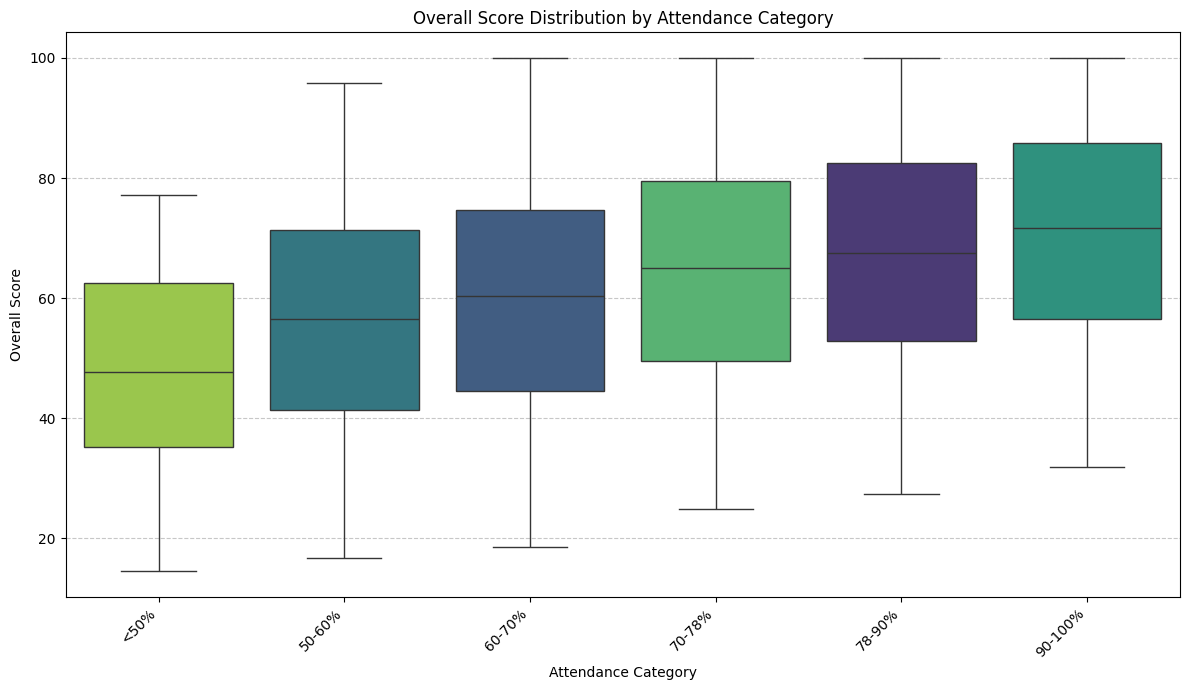

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
# Define the order for the attendance categories to ensure proper display
category_order = ['<50%', '50-60%', '60-70%', '70-78%', '78-90%', '90-100%']
sns.boxplot(x='attendance_category', y='overall_score', data=data, palette='viridis', order=category_order, hue='attendance_category', legend=False)
plt.title('Overall Score Distribution by Attendance Category')
plt.xlabel('Attendance Category')
plt.ylabel('Overall Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

###Summary
Overall score seemed to be correlate most with the number of study hours.  Overall score was mildly correlated to attendance. Neither study hours or attendance seemed to be correlated any of the other categorical variables.

In [60]:
from google.colab import drive
drive.flush_and_unmount()